# TP 5 Réseaux de neurones - Multi classification et Propagation en arrière
Dans ce TP, nous aimerions entrainer un réseau de neurones pour la tâche de classification en utilisant l'algorithme d propagation en arrière (backpropagation).

L'ensemble de données que nous allons utiliser est le même que celui utilisé durant le TP1, i.e. les images de chiffres manuscrits.


# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import cv2 

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(5000, 401)

Dans ces données (data), les 400 premières colonnes representent les pixels de l'image (20x20), la dernière colonne represente la classe de l'image (chiffres de 0 à 9). (http://yann.lecun.com/exdb/mnist/)

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,:-1]))
y=data[:,-1]
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [4]:
print('X', X.shape ,' y ', y.shape)

X (5000, 401)  y  (5000, 1)


Visualisation aléatoire de quelques données

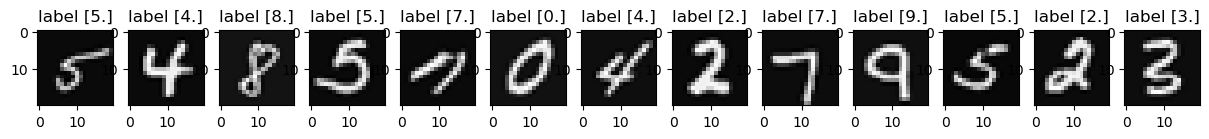

In [5]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c,1:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(y[c]))
    plt.imshow(a,cmap='gray')

Transformer y de tel sorte à avoir un vecteur pour chaque exemple

Equivalent de tocategorical

In [6]:
YY=np.zeros((y.shape[0], int(np.max(y))+1))
YY.shape

(5000, 10)

In [7]:
for i in range (YY.shape[0]):
    YY[i,int(y[i])]=1

# Réseaux de neurones
Pour cette partie, nous choisissons une réseau simple:

- une couche d'entrée avec 400 noeuds (20 x 20 pixels) + le biais
- une couche cachée avec 25 noeuds
- une couche de sortie avec 10 noeuds (nombre de classes)

In [8]:
# poids de la couche 1
W1 = np.genfromtxt('W1.csv', delimiter=',', dtype=float)
W1.shape


(25, 401)

In [9]:
# poids de la couche 2
W2 = np.genfromtxt('W2.csv', delimiter=',', dtype=float)
W2.shape

(10, 26)

In [10]:
input_layer_size  = 400
hidden_layer_size = 25   
num_labels = 10

# Calcul du coût

# TODO  1 calcul du coût
**Tâche 1**: Modifier la fonction computeCost afin d'obtenir un coût avec régularisation

Rappelons que le coût avec régularisation est calculé comme suit:

$ J(\theta)= \frac{1}{m} \sum_{i=1}^m\sum_{k=1}^K \left[ -y_k^{(i)} \log (h_\theta(x^{(i)}) )_k - (1-y_k^{(i)}) \log (1-h_\theta(x^{(i)}) )_k \right] + \frac{\lambda}{2m} \left[ \sum_{j=1}^{25}\sum_{k=1}^{400} \left( \theta_{j,k}^{(1)} \right)^2 +   \sum_{j=1}^{10}\sum_{k=1}^{25} \left( \theta_{j,k}^{(2)} \right)^2 \right] $

In [11]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+np.exp(-z))

In [12]:
def computeCost(X, YY, theta1, theta2,hidden_layer_size, lambda_):
    a1=X; 

    z2= np.zeros((X.shape[0],hidden_layer_size))
    a2= np.zeros((X.shape[0],hidden_layer_size)) 

    intercept=np.ones((X.shape[0],1))
    z2=np.column_stack((intercept,np.matmul(a1,np.transpose(theta1))))
    a2=Sigmoid(z2)
    a2[:,0]=1

    z3= np.zeros((YY.shape[0],YY.shape[1]))    
    a3= np.zeros((YY.shape[0],YY.shape[1]))  

    z3=np.matmul(a2,np.transpose(theta2))
    a3=Sigmoid(z3)

    J=np.zeros((YY.shape[0],1))
    
    # cout sans regularisation 
    # J= (1/y.shape[0])*(np.sum(np.sum((-YY*np.log(a3))-((1-YY)*np.log(1-a3)))))
    
    # cout avec regularisation autre calcul 
    # J = (1 / YY.shape[0]) * (np.sum(np.sum((-YY * np.log(a3)) - ((1 - YY) * np.log(1 - a3)))))
    # reg_term_theta1 = (lambda_ / (2 * YY.shape[0])) * np.sum(np.sum(np.power(theta1[:, 1:], 2)))
    # reg_term_theta2 = (lambda_ / (2 * YY.shape[0])) * np.sum(np.sum(np.power(theta2[:, 1:], 2)))
    # J += reg_term_theta1 + reg_term_theta2
    
    # Calculating the cost without regularization
    # J avec regularisation 
    J = J = (1 / y.shape[0]) * (np.sum(np.sum((-YY * np.log(a3)) - ((1 - YY) * np.log(1 - a3))))) + \
        (lambda_ / (2 * X.shape[0])) * (np.power(theta1[:, 1:], 2).sum() + np.power(theta2[:, 1:], 2).sum())

    
    
    return J

def computeCostWR(X, YY, theta1, theta2,hidden_layer_size, ):
    a1=X; 

    z2= np.zeros((X.shape[0],hidden_layer_size))
    a2= np.zeros((X.shape[0],hidden_layer_size)) 

    intercept=np.ones((X.shape[0],1))
    z2=np.column_stack((intercept,np.matmul(a1,np.transpose(theta1))))
    a2=Sigmoid(z2)
    a2[:,0]=1

    z3= np.zeros((YY.shape[0],YY.shape[1]))    
    a3= np.zeros((YY.shape[0],YY.shape[1]))  

    z3=np.matmul(a2,np.transpose(theta2))
    a3=Sigmoid(z3)

    J=np.zeros((YY.shape[0],1))
    
    # cout sans regularisation 
    # J= (1/y.shape[0])*(np.sum(np.sum((-YY*np.log(a3))-((1-YY)*np.log(1-a3)))))
    
    # cout avec regularisation autre calcul 
    # J = (1 / YY.shape[0]) * (np.sum(np.sum((-YY * np.log(a3)) - ((1 - YY) * np.log(1 - a3)))))
    # reg_term_theta1 = (lambda_ / (2 * YY.shape[0])) * np.sum(np.sum(np.power(theta1[:, 1:], 2)))
    # reg_term_theta2 = (lambda_ / (2 * YY.shape[0])) * np.sum(np.sum(np.power(theta2[:, 1:], 2)))
    # J += reg_term_theta1 + reg_term_theta2
    
    # Calculating the cost without regularization
    # J avec regularisation 
    J = J = (1 / y.shape[0]) * (np.sum(np.sum((-YY * np.log(a3)) - ((1 - YY) * np.log(1 - a3))))) 
        
    
    
    return J




# TODO  2 calcul du gradient
**Tâche 2**: Implémenter la fonction NNCostFunction afin de retourner:

- Le coût avec régularisation
- Le gardient du coût par rapport à chaqu'un des paramètres du réseau

Rappelons le gradient de la sigmoid:

$ sigmoid(z) =\sigma(z)= \frac{1}{1-e^{-z}}$

$ \sigma(z)^\prime = \sigma(z)(1-\sigma(z)) =a(1-a)$ tel que $a$ est l'activation d'une couche donnée

L'algorithme à implementer est comme suit:

Pour chaque exemple de l'ensemble d'apprentissage faire

Pour chaque noeud de la couche de sortie, calculer la dérivée (gradient):

$\delta_k^{(3)} = \left( a_k^{(3)}- y_k \right)  $

Pour chaque noeud de la couche caché calculer la dérivée (gradient):

$\delta^{(2)} =  \left(\Theta^{(2)}\right)^T \delta^{(3)} \quad .* \quad \sigma^\prime\left(z^{(2)} \right) $

Notons que l'opérateur $.*$ represente la multiplication élement par élement et non pas la multiplication matricielle

Le gradient de chaque noeud et de chaque couche sera finalement:

$\Delta^{(l)} =  \Delta^{(l)} + \delta^{(l)} * \left( a^{(l)} \right)^T $

Fin pour

Fin pour

Diviser le gradient cumulé par le nombre d'exemples:

$ \frac{\partial J(\Theta)} { \partial \Theta_{i,j)}^{(l)}} = \frac{1}{m} \Delta_{i,j)}^{(l)}$


In [13]:
# cette fonction va retourner le cout avec regularisation et theta1 theta2  ce qui est equivalent a grad 
def NNCostFunction(X, YY, theta1, theta2,hidden_layer_size,lambda_):
   
    theta1_grad = np.zeros((theta1.shape[0],theta1.shape[1]))
    theta2_grad = np.zeros((theta2.shape[0],theta2.shape[1]))
    
    # step 1  Preparations for Propagation en arriere 
    m =X.shape[0]
    a1 = X
    
    z2 = np.dot(a1, theta1.T)
    
    # CALCUL a2 avec sigmoid avec l ajout du column bias des  1 
    a2 = Sigmoid(z2)
    a2 = np.insert(a2, 0, 1, axis=1) 
    # or directly do 
    # a2 = np.column_stack((np.ones((z2.shape[0], 1)), Sigmoid(z2))) 
    
    z3 = np.dot(a2, theta2.T)
    a3 = Sigmoid(z3)
    
    # step 2 calcul de delta 
    delta3 = a3 - YY
    # calcul mult matricielle entre delta3 et theta2 apres le mult avec Sigmoid(z) * (1 - Sigmoid(z))
    # ou calcul matricielle entre  delta3 et theta2 et un mult normal du resultat avec a2 * (1 - a2))[:, 1:]
    delta2 = ((delta3 @ theta2) * a2 * (1 - a2))[:, 1:] 
    
    # step 3 
    # calcul du cout J avec la fonction Computecost 
    J = computeCost(X, YY, theta1, theta2, hidden_layer_size, lambda_)
    
    # calcul gradient sans R
    theta2_grad += np.dot(delta3.T, a2)
    theta1_grad += np.dot(delta2.T, a1)
    
    # Ajout de la regularisation 
    theta2_grad[:, 1:] += (lambda_ / m) * theta2[:, 1:]
    theta1_grad[:, 1:] += (lambda_ / m) * theta1[:, 1:]

    # diviser le gradient par le nombres d examples 
    theta2_grad /= m
    theta1_grad /= m
    
    grad = [theta1_grad, theta2_grad]
    
    
    return J, grad

# TODO  3 entrainement du réseau
**Tâche 3**: Entrainer le réseau en utilisant la descente du gradient:
Ici il faudra reprendre l'algorithme de la descente du gradient afin de mettre à jour les paramètres du réseau


Size of theta[0]: (25, 401)
Size of theta[1]: (10, 26)


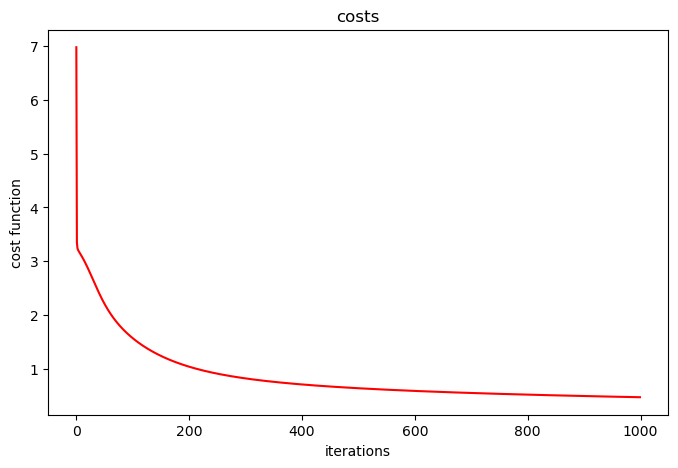

In [14]:
# gradient descent normal one 
def gradientDescent1(X, y, theta, alpha, iterations):
    
    n = X.shape[0] 
        
    costs = np.zeros(iterations)
    theta0_h = np.zeros(iterations)
    theta1_h = np.zeros(iterations)

    for i in range(iterations):
        
        # calcule du predict
        h = np.dot(X,theta)
        
        # calcule du gradient
        gradient = np.dot(X.T, h - y) / n

        # maj theta        
        theta = theta - alpha * gradient

        # calcule cout
        cost = computeCost(X,y,theta)
        # print("cost : %s" % cost)
        costs[i] = cost
        theta0_h[i] = theta[0]
        theta1_h[i] = theta[1]



    return theta, costs, theta0_h, theta1_h

# gradient descent that calculates the J and grad for our RN 
def gradientDescent(X, y, theta, alpha, iterations, hidden_layer_size, lambda_):
    m = X.shape[0] 
        
    costs = np.zeros(iterations)
    theta0_h = np.zeros(iterations)
    theta1_h = np.zeros(iterations)

    for i in range(iterations):
        
        J, grad = NNCostFunction(X, YY, theta[0], theta[1], hidden_layer_size,lambda_)

        
        theta[0] -= alpha * grad[0]
        theta[1] -= alpha * grad[1]

        
        costs[i] = J

        
       

    return  costs


def plot_cost_function(cost_history, iterations):
    plt.figure(figsize=(8, 5))
    plt.plot(np.arange(iterations), cost_history, 'r', 5)
    plt.title("costs")
    plt.xlabel('iterations')
    plt.ylabel('cost function')
    # comparer le temps de traitement
    
    
iterations = 1000
alpha = 0.5
lambda_ = 0.2
theta = [np.random.normal(0, np.sqrt(1/212), W1.shape), np.random.normal(0, np.sqrt(1/17), W2.shape)]
# Print the size of each element in theta
for i, element in enumerate(theta):
    print(f"Size of theta[{i}]: {element.shape}")
    
costs = gradientDescent(X, YY, theta, alpha, iterations ,hidden_layer_size,lambda_)
plot_cost_function(costs, iterations)

# TODO 4 : Régularisation
Mettre à jour le calcul du coût en ajoutant le terme de régularisation et comparer les résultats (avec et sans régularisation)

In [15]:
theta = [np.random.normal(0, np.sqrt(1/212), W1.shape), np.random.normal(0, np.sqrt(1/17), W2.shape)]
lambda_=0.0000000000001
initcostwithR = computeCost(X, YY, theta[0], theta[1],hidden_layer_size, lambda_)
print (initcostwithR)



5.627261729776033


In [16]:
theta = [np.random.normal(0, np.sqrt(1/212), W1.shape), np.random.normal(0, np.sqrt(1/17), W2.shape)]

initcostwithouR = computeCostWR(X, YY, theta[0], theta[1],hidden_layer_size)
print (initcostwithouR)

8.222815141287327


# TODO 5 : Prédiction

Appliquer une propagation en avant en utilisant les paramètres données pour prédir les classes de l'ensemble d'apprentissage.



In [17]:
# we are gonna predict the  classes using the neural network method (with one hidden layer)
# after retreiving the weights W1 , W2  the input layer nodes and the hidden layer nodes 
# after getting the input data 
# we use these as parameters to predict 

def predict (W1, W2, X):
    
    # appliquer une propagation en avant
    # !--- n'oubliez pas d'appliquer la sigmoid à chaque couche afin d'avoir les probabilités ---! // calculer l'activation
    
    # prédire la classe en choisissant la probabilité maximale parmi les 10 noeuds de sortie
    
    # calcul des activation 
    h1_output = Sigmoid(np.dot(X, W1.T))

    # stacking the intercept and h1_outputs (input layer computing ) and save it in h2_input 
    intercept = np.ones((X.shape[0],1))

    h2_input = np.column_stack((intercept, h1_output))

    # compute the h2_output using the h2_input and the data from the hidden layer 
    h2_output = Sigmoid(np.dot(h2_input, W2.T))

    # predict the classes using the h2_output 
    y_pred = np.argmax(h2_output, axis=1)[..., np.newaxis]
    
    # some adjustments
    y_pred = y_pred + 1
    y_pred[y_pred==10] = 0

    return y_pred

In [18]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred=predict(W1, W2, X)
precision = np.mean(y==y_pred)*100
precision

97.52

# optionnel 1 : Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [19]:
from sklearn.neural_network import MLPClassifier

# Create and train the scikit-learn MLPClassifier
clf = MLPClassifier(solver='sgd', alpha=0.01, activation='logistic', max_iter=5000,
                    hidden_layer_sizes=(25,), random_state=42)
clf.fit(X[:, 1:], YY)

# Make predictions using scikit-learn model
y_pred_sklearn = clf.predict(X[:, 1:])

# Calculate accuracy using scikit-learn's score method
accuracy_sklearn = clf.score(X[:, 1:], YY) * 100

# Calculate accuracy manually for comparison
accuracy_manual = np.mean(y == y_pred_sklearn) * 100

print("Accuracy (scikit-learn): {:.2f}%".format(accuracy_sklearn))
print("Accuracy (manual): {:.2f}%".format(accuracy_manual))


Accuracy (scikit-learn): 89.22%
Accuracy (manual): 9.98%
